In [2]:
import pandas as pd
import sqlite3
import matplotlib

In [3]:
conn = sqlite3.connect('02_03_SSDM_Assignment_2_Zenara_subscriptions.db')
c = conn.cursor()

In [4]:
c.execute("Select name from sqlite_master WHERE type = 'table';")
c.fetchall()

[('StatusCodes',), ('ChurnCodes',), ('Clients',), ('Subscriptions',)]

In [5]:
df_sub = pd.read_sql_query ("SELECT * FROM Subscriptions", conn)
print(df_sub.shape)
# df_sub.head(5)
df_sub

(40533, 13)


,SubscriptionID,STATUS_PORTFOLIO,STATUS_REASON,TECHNICAL_COMMENCEMENT_DATE,VERSION_START_DATE,PRODUCT,PRODUCT_TYPE,AGENCY,REGION,CITY,DEVICE,MONTHLY_FEE,ClientID
0,300006922,->,w,2022-04-01 00:00:00,2022-03-11 00:00:00,13287,Old,NORTH DAKOTA,ND,None,Mobile Device,4.180840,4003084
1,300017127,canclltn,unpd_prm,2020-09-01 00:00:00,2022-08-04 00:00:00,13226,Old,JADRAN+,TX,None,Mob.dev.,0.015605,599399
2,300017135,canclltn,ovrd,2020-09-01 00:00:00,2022-08-04 00:00:00,13226,Old,JADRAN+,TX,None,Mob.dev.,0.016399,3402393
3,300024841,->,w,2020-02-01 00:00:00,2024-02-01 00:00:00,13226,Old,ALASKA,AK,None,mobile,2.119427,6227806
4,300030872,->,w,2020-07-01 00:00:00,2023-07-01 00:00:00,13226,Old,MISSOURI,MO,None,Mob.dev.,6.836562,796637
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40528,322676464,->,w,2024-03-01 00:00:00,2024-02-28 00:00:00,13401,New,PREMIUM,NY,None,mobile,6.019800,6771706
40529,322676620,->,w,2024-03-01 00:00:00,2024-02-28 00:00:00,13401,New,ARIZONA,AZ,None,Telev,4.745482,4717149
40530,322677131,->,w,2024-03-01 00:00:00,2024-02-28 00:00:00,13401,New,ALASKA,AK,None,Browser,4.743958,123928
40531,322677389,->,w,2024-03-01 00:00:00,2024-02-28 00:00:00,13401,New,ALASKA,AK,None,browser,4.720996,4939771


In [6]:
df_statuscode = pd.read_sql_query ("SELECT * FROM StatusCodes", conn)
print(df_statuscode.shape)
df_statuscode.head(5)

(4, 2)


,STATUS_PORTFOLIO,Description
0,->,Subscriber
1,srrndr,Cancelled
2,canclltn,Cancelled
3,susP,Suspended


In [7]:
df_churncodes = pd.read_sql_query ("SELECT * FROM ChurnCodes", conn)
print(df_churncodes.shape)
df_churncodes.head(5)

(11, 2)


,STATUS_REASON,Description
0,w,Cancelled
1,ovrd,Overdue fee
2,srrnd_cnclltn_o,Cancelled
3,deseased,Deceased Client
4,strnd_cnclltn_o,Cancelled


In [8]:
df_clients = pd.read_sql_query ("SELECT * FROM Clients", conn)
print(df_clients.shape)
df_clients.head(5)

(44381, 3)


,ClientID,BIRTH_DATE,Sex
0,420,10- VIII.- 36,Male
1,927,2- I.- 53,Female
2,1399,1993-02-16 00:00:00,Male
3,1505,9- XI.- 61,Male
4,1730,1980-10-22 00:00:00,Male


In [9]:
# conn.close()

Task 2.1 a)

In [10]:
print(df_sub.dtypes)

SubscriptionID                   int64
STATUS_PORTFOLIO                object
STATUS_REASON                   object
TECHNICAL_COMMENCEMENT_DATE     object
VERSION_START_DATE              object
PRODUCT                          int64
PRODUCT_TYPE                    object
AGENCY                          object
REGION                          object
CITY                            object
DEVICE                          object
MONTHLY_FEE                    float64
ClientID                         int64
dtype: object


Task 2.1 b)

<Axes: xlabel='PRODUCT'>

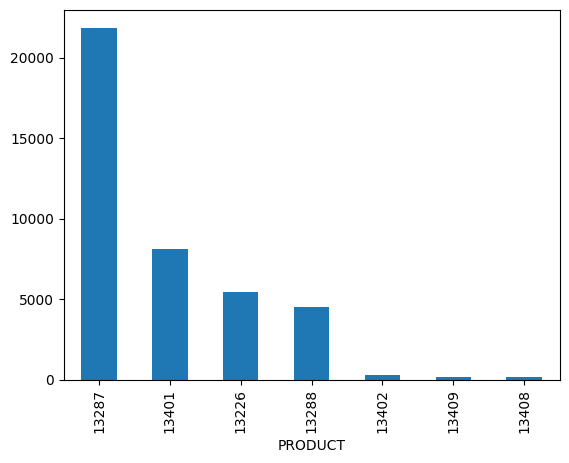

In [11]:
df_sub['PRODUCT'].value_counts().plot(kind= 'bar')

<Axes: >

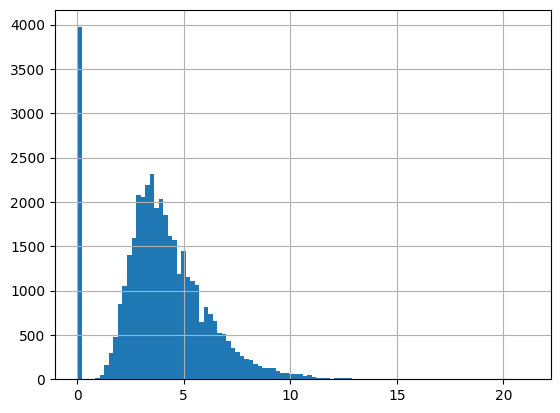

In [12]:
df_sub['MONTHLY_FEE'].hist(bins=100)

In [13]:
df_clients['BIRTH_DATE'].value_counts()

BIRTH_DATE
28- II.- 76            13
1988-04-02 00:00:00    11
1985-11-21 00:00:00    11
1984-11-08 00:00:00    10
14- XI.- 62            10
                       ..
1997-02-25 00:00:00     1
13- VIII.- 57           1
17- V.- 54              1
10- IX.- 74             1
26- VI.- 51             1
Name: count, Length: 18413, dtype: int64

In [14]:
df_sub['TECHNICAL_COMMENCEMENT_DATE'] = pd.to_datetime(df_sub['TECHNICAL_COMMENCEMENT_DATE'])
print(df_sub['TECHNICAL_COMMENCEMENT_DATE'].value_counts())
print(df_sub['TECHNICAL_COMMENCEMENT_DATE'].max())
print(df_sub['TECHNICAL_COMMENCEMENT_DATE'].min())

TECHNICAL_COMMENCEMENT_DATE
2021-12-01    1884
2021-04-01    1582
2021-01-01    1486
2022-11-01    1482
2020-11-01    1447
2021-07-01    1339
2022-05-01    1287
2021-11-01    1286
2022-10-01    1264
2020-12-01    1238
2022-04-01    1220
2023-01-01    1207
2022-12-01    1199
2020-10-01    1141
2023-11-01    1079
2020-09-01    1015
2021-08-01     986
2023-04-01     947
2021-03-01     812
2023-12-01     789
2023-06-01     748
2020-08-01     739
2022-07-01     733
2022-03-01     727
2023-07-01     689
2020-07-01     674
2023-10-01     663
2024-01-01     638
2022-08-01     603
2021-06-01     592
2022-01-01     589
2021-10-01     586
2021-05-01     585
2021-09-01     566
2020-05-01     560
2020-06-01     545
2022-09-01     534
2022-06-01     522
2023-03-01     517
2024-02-01     515
2024-03-01     496
2021-02-01     492
2023-08-01     488
2022-02-01     462
2023-05-01     454
2023-09-01     328
2023-02-01     315
2020-02-01     281
2020-04-01     135
2020-03-01      67
Name: count, dtype: in

After examing these fields, the first possible explanation for the increase in subscription cancellations is that Zerena offers a large number of products, but the efficiency applied to each product is uneven. This problem can be seen from the difference in number of users between products. The second possible explaination might be the problem with inappropriate target audience. We can see that the age range of major clients is between 36 and 62 years old (born between 1962 and 1988). However, the primary target audience for a music streaming service is younger, making Zerena Connect+ more suitable for them. 

Task 2.2

In [15]:
df_clients

,ClientID,BIRTH_DATE,Sex
0,420,10- VIII.- 36,Male
1,927,2- I.- 53,Female
2,1399,1993-02-16 00:00:00,Male
3,1505,9- XI.- 61,Male
4,1730,1980-10-22 00:00:00,Male
...,...,...,...
44376,6999271,21- VII.- 74,Female
44377,6999357,11- VIII.- 76,Male
44378,6999709,1997-12-19 00:00:00,Male
44379,6999830,24- IX.- 79,Female


In [ ]:
def format_date(date):

    if pd.isna(date):  
        return None
    
    if isinstance(date, str):  
        date_parts = date.split('-')

        if len(date_parts) != 3: 
            # print(f"Error: Invalid date format - {date}")
            return None  
        
        #day
        if int(date_parts[0]) >= 10:
            day = date_parts[0].strip()
        else:
            day = '0'+ date_parts[0].strip()
        
        #year
        year = '19' + date_parts[2].strip()

        #month
        month = date_parts[1].strip().replace('.', '') 
        roman_to_month = {
            "I": "01", "II": "02", "III": "03", "IV": "04", "V": "05", "VI": "06",
            "VII": "07", "VIII": "08", "IX": "09", "X": "10", "XI": "11", "XII": "12"
        }
        if month in roman_to_month:
            month = roman_to_month[month]
        else:
            print(f"Error: Invalid month - {month}")
            return None 
        
        return f"{year}-{month}-{day}"
    else:
        return None


In [17]:
df_clients_temp = df_clients.copy(deep=True)
# print(df_clients_temp)

df_clients['BIRTH_DATE'] = pd.to_datetime(df_clients['BIRTH_DATE'], errors='coerce')
# print(df_clients_temp)


null_index = df_clients[df_clients['BIRTH_DATE'].isna()].index.tolist()
# print(df_clients_temp)
# print(null_index)

# print(df_clients_temp.loc[1, 'BIRTH_DATE'])

df_clients_temp.loc[null_index, 'BIRTH_DATE'] = df_clients_temp.loc[null_index, 'BIRTH_DATE'].apply(format_date)

df_clients_temp.loc[null_index, 'BIRTH_DATE'] = pd.to_datetime(df_clients_temp.loc[null_index, 'BIRTH_DATE'])
# print(df_clients_temp)

# # Merge the results back to the original dataframe
df_clients.loc[null_index, 'BIRTH_DATE'] = df_clients_temp.loc[null_index, 'BIRTH_DATE']

print(df_clients)
df_clients.dtypes



# print(df_clients.iloc[df_clients['BIRTH_DATE'].isna(), 'BIRTH_DATE'])
# Apply format_date() only to invalid date values and update df_clients directly
# df_clients.iloc[df_clients['BIRTH_DATE'].isna(), 'BIRTH_DATE'] = (
#     df_clients_temp.loc[df_clients['BIRTH_DATE'].isna(), 'BIRTH_DATE']
#     .astype(str)
#     .apply(format_date)
# )


# Convert newly formatted values back to datetime
# df_clients['BIRTH_DATE'] = pd.to_datetime(df_clients['BIRTH_DATE'], errors='coerce')

/var/folders/l6/hf84dcw12ns310x798rtj0gc0000gn/T/ipykernel_17327/2479848821.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clients['BIRTH_DATE'] = pd.to_datetime(df_clients['BIRTH_DATE'], errors='coerce')


       ClientID BIRTH_DATE     Sex
0           420 1936-08-10    Male
1           927 1953-01-02  Female
2          1399 1993-02-16    Male
3          1505 1961-11-09    Male
4          1730 1980-10-22    Male
...         ...        ...     ...
44376   6999271 1974-07-21  Female
44377   6999357 1976-08-11    Male
44378   6999709 1997-12-19    Male
44379   6999830 1979-09-24  Female
44380   6999961 1973-11-26    Male

[44381 rows x 3 columns]


ClientID               int64
BIRTH_DATE    datetime64[ns]
Sex                   object
dtype: object

In [18]:
from datetime import datetime
current_date = pd.to_datetime(datetime.today().date())
df_clients['AGE'] = (current_date - df_clients['BIRTH_DATE']).dt.days/365.25
print(df_clients)

       ClientID BIRTH_DATE     Sex        AGE
0           420 1936-08-10    Male  88.558522
1           927 1953-01-02  Female  72.161533
2          1399 1993-02-16    Male  32.038330
3          1505 1961-11-09    Male  63.310062
4          1730 1980-10-22    Male  44.358658
...         ...        ...     ...        ...
44376   6999271 1974-07-21  Female  50.614648
44377   6999357 1976-08-11    Male  48.555784
44378   6999709 1997-12-19    Male  27.200548
44379   6999830 1979-09-24  Female  45.437372
44380   6999961 1973-11-26    Male  51.263518

[44381 rows x 4 columns]


In [19]:
# def format_date(date):
#     if pd.isna(date):
#         return None
#     date = date.split('-')

#     if len(date) != 3:
#         print(date)  # Ensure the split has exactly 3 parts
#         return None

#     day = date[0]
#     year = '19' + date[2].strip()
#     month = date[1].strip().replace('.','')
#     roman_to_month = {
#     "I": "01", "II": "02", "III": "03", "IV": "04", "V": "05", "VI": "06",
#     "VII": "07", "VIII": "08", "IX": "09", "X": "10", "XI": "11", "XII": "12"}
#     if month in roman_to_month:
#         month = roman_to_month[month]
#     else:
#         print('error')
#     return year + '-' + month + '-' + day


In [20]:
# df_clients_temp = df_clients.copy()
# df_clients['BIRTH_DATE'] = pd.to_datetime(df_clients['BIRTH_DATE'],errors='coerce')
# df_clients.loc[df_clients['BIRTH_DATE'].isna(), 'BIRTH_DATE'] = (
#     df_clients_temp.loc[df_clients['BIRTH_DATE'].isna(), 'BIRTH_DATE']
#     .astype(str)
#     .apply(format_date)
# )

# df_clients['BIRTH_DATE'] = pd.to_datetime(df_clients['BIRTH_DATE'], errors='coerce')

Task 2.3

In [21]:
df_sub['DEVICE'].unique()

array(['Mobile Device', 'Mob.dev.', 'mobile', 'TV', 'Telev', 'television',
       'Browser', 'Brow.', 'browser'], dtype=object)

In [25]:
types_of_devices = ['Mobile Device', 'TV', 'Browser']
device_mapping = {
    'Mobile Device': ['Mob.dev.', 'mobile', 'Mobile Device'],
    'TV': ['TV', 'Telev', 'television'],
    'Browser': ['Browser', 'Brow.', 'browser']
}
def map_device(device):
    for category, variations in device_mapping.items():
        # print(category)
        # print(variations)
        # print()
        if device in variations:
            return category
    return 'Unknown'
df_sub['DEVICE']= df_sub['DEVICE'].apply(map_device)
print(df_sub['DEVICE'])

0        Mobile Device
1        Mobile Device
2        Mobile Device
3        Mobile Device
4        Mobile Device
             ...      
40528    Mobile Device
40529               TV
40530          Browser
40531          Browser
40532    Mobile Device
Name: DEVICE, Length: 40533, dtype: object


Task 2.4

In [ ]:
#checking which rows belong to Central Online Customer Contact Agency
import us
import geonamescache

In [ ]:
#Innitialize the geonames cache
gc = geonamescache.GeonamesCache()

#get dictionary of us states with their codes
us_states = gc.get_us_states()
# This gives state data in format {state_code: {'name': state_name, ...}, ...}

#Get dictionary of citiess
cities_dict = gc.get_cities()

In [ ]:
# Create a mapping from admin1code to state abbreviation
admin1_to_state = {}
for state_code, state_info in us_states.items():
    # The admin1code in cities is stored as 'US.' + state number code
    admin1_code = f"US.{state_info['fips']}"  # Use square brackets here
    admin1_to_state[admin1_code] = state_code

In [ ]:
# Create a dictionary to map US city names to state abbreviations
city_to_state = {}

In [ ]:
# Iterate through cities and extract US cities with their state codes
for city_id, city_data in cities_dict.items():
    #checl if the city is in the US
    if city_data["countrycode"] == "US":
        city_name = city_data["name"]
        #The state code is in the admin' field for US cities
        state_code = city_data['admin1code']

        # Get the state abbreviation
        if admin1_code in admin1_to_state:
            state_abbr = admin1_to_state[admin1_code]

        # Add to our city-to-state mapping
        if city_name not in city_to_state:
            city_to_state[city_name] = []
        if state_abbr not in city_to_state[city_name]:
            city_to_state[city_name].append(state_abbr)

In [ ]:
#preview a few mappings
for city, states in list(city_to_state.items())[:5]:
    print(f"{city}: {', '.join(states)}")

In [ ]:
# Function to get state abbreviation for a city
def get_state_for_city(city_name):
    if city_name in city_to_state:
        states = city_to_state[city_name]
        return states[0]
    return None

In [ ]:
#Initialize new column with ANSI standard state name
df_sub["STATE_ABBR"] = None

In [ ]:
# Map city to state for non-available region
df_sub.loc[df_sub["CITY"] != 'NaN', "STATE_ABBR"] = df_sub["CITY"].apply(get_state_for_city)

#Map existing state abbreviations for othr agencies
df_sub.loc[df_sub["REGION"] != 'NaN', "STATE_ABBR"] = df_sub["REGION"]

#Handle
df_sub["STATE_ABBR"].fillna("Unkown", inplace=True)


In [ ]:
print(df_sub["STATE_ABBR"].iloc[50:60])